# Observations

#### 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "./Resources/Mouse_metadata.csv"
study_results_path = "./Resources/Study_results.csv"

# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
mouse_metadata = pd.read_csv(mouse_metadata_path)


# Combine the data into a single dataset
combined_data= pd.merge(study_results, mouse_metadata,
                       on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
mice_count=len(combined_data["Mouse ID"].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_data_df=combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:

combined_data_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [27]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=combined_data[~combined_data["Mouse ID"].isin(combined_data_df["Mouse ID"])]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count=len(clean_data["Mouse ID"].unique())
clean_mice_count


248

# Summary Statistics 

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_stats= clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_stats=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_stats=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
sd_stats=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_stats=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem() 



In [10]:
# Assemble the resulting series into a single summary DataFrame.

statistics_summary= pd.DataFrame({"Mean Tumor Volume": mean_stats, "Median Tumor Volume": median_stats,
                                  "Tumor Volume Variance": var_stats, "Tumor Volume Std. Dev.": sd_stats,
                                 "Tumor Volume Std. Err.": sem_stats})

statistics_summary.index.name= "Drug Regimen"

statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean_stats_agg =clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('mean')
median_stats_agg=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('median')
var_stats_agg=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('var')
sd_stats_agg=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('std')
sem_stats_agg=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('sem') 


# Using the aggregation method, produce the same summary statistics in a single line.

In [12]:
statistics_summary_agg= pd.DataFrame({"mean": mean_stats_agg, "median": median_stats_agg,
                                  "var": var_stats_agg, "std": sd_stats_agg,
                                 "sem": sem_stats_agg})

statistics_summary_agg.index.name= "Drug Regimen"



statistics_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

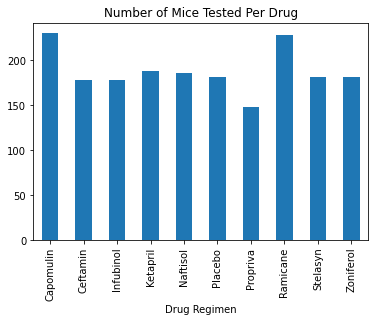

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_name=clean_data.groupby("Drug Regimen")


count_of_mice=drug_name["Mouse ID"].count()
bar_panda=count_of_mice.plot(kind="bar", title="Number of Mice Tested Per Drug")
bar_panda.set_xlabel=("Drug Regimen")
bar_panda.set_ylabel=("Number of Mice Tested")

plt.show()

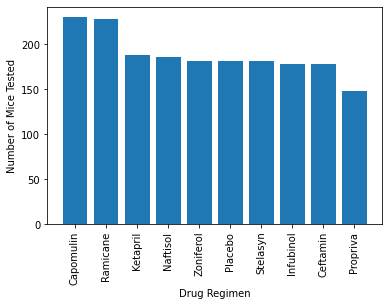

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

counts = clean_data['Drug Regimen'].value_counts()
x_values = counts.index.values
y_values = counts.values
plt.bar(x_values, y_values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

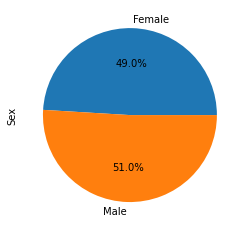

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels=["Male", "Female"]
gender=clean_data.groupby("Sex")
gender_percent=gender["Sex"].count()


gender_pie=gender_percent.plot(kind="pie", y="Sex", autopct="%1.1f%%")

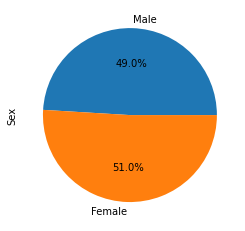

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_percent, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


# Quartiles, Outliers, and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint=clean_data.groupby("Mouse ID")
timepoint=timepoint["Timepoint"].max()
timepoint_df=pd.DataFrame(timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume=pd.merge(timepoint_df, clean_data, on=["Mouse ID", "Timepoint"])
final_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

for x in treatments:
    volume= final_tumor_volume.loc[final_tumor_volume["Drug Regimen"]==x,"Tumor Volume (mm3)"]
    tumor_vol.append(volume)
    


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

 # Locate the rows which contain mice on each drug and get the tumor volumes

    quartiles=volume.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq

 # add subset


 # Determine outliers using upper and lower bounds
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)

    outliers=volume.loc[(volume>upper_bound)|(volume<lower_bound)]
    outliers
    print(f'{x} potential outliers: {outliers}')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


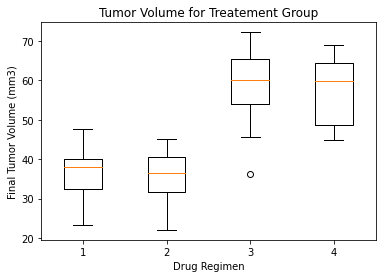

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# plt.boxplot(final_tumor_volume, labels=treatments)

fig1, ax1=plt.subplots()
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_title("Tumor Volume for Treatement Group")
ax1.boxplot(tumor_vol)
plt.show()

# Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
final_tumor_volume.loc[final_tumor_volume["Drug Regimen"]=="Capomulin"].head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22


In [21]:
b742_id=clean_data.loc[clean_data["Mouse ID"]=="b742"]
b742_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
229,b742,0,45.000000,0,Capomulin,Male,7,21
327,b742,5,41.534097,0,Capomulin,Male,7,21
682,b742,10,41.999228,0,Capomulin,Male,7,21
839,b742,15,39.524843,0,Capomulin,Male,7,21
935,b742,20,37.950355,0,Capomulin,Male,7,21
1224,b742,25,38.617684,0,Capomulin,Male,7,21
1308,b742,30,39.167949,0,Capomulin,Male,7,21
1614,b742,35,39.847576,0,Capomulin,Male,7,21
1676,b742,40,38.255627,0,Capomulin,Male,7,21
1829,b742,45,38.939633,0,Capomulin,Male,7,21


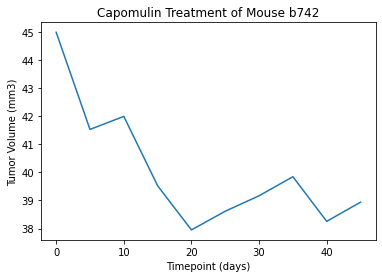

In [22]:
plt.plot(b742_id["Timepoint"],b742_id["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse b742")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [24]:
capomulin_data=clean_data[clean_data["Drug Regimen"]=="Capomulin"]
capomulin_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


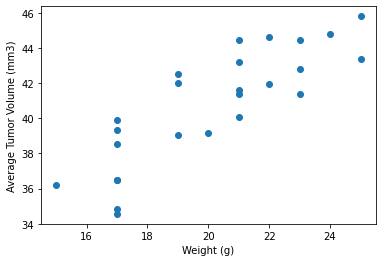

In [25]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_id=capomulin_data.groupby("Mouse ID").mean()
mouse_weight=capomulin_id["Weight (g)"]
avg_tumor_vol=capomulin_id["Tumor Volume (mm3)"]

plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume 
for the Capomulin regimen is 0.84


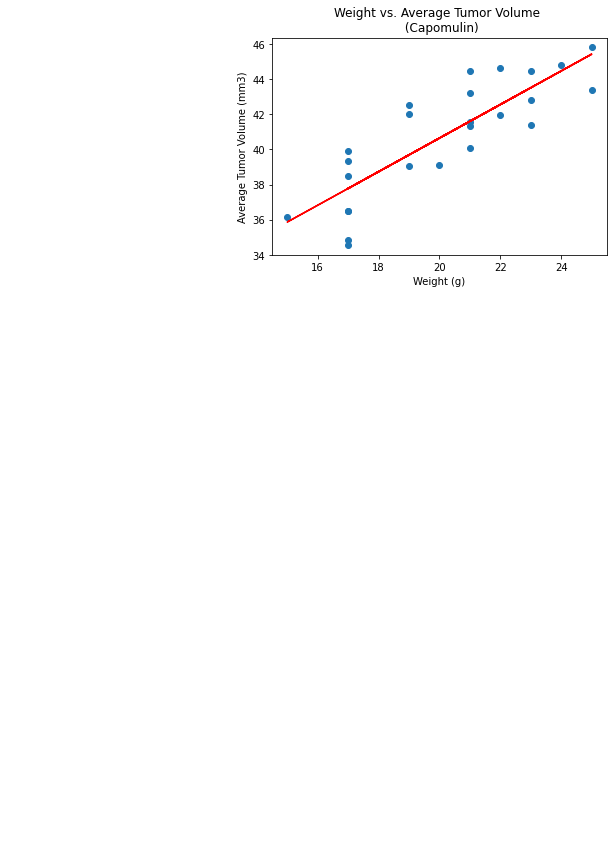

In [26]:
# Calculate the correlation coefficient and linear regression model 
print(f"The correlation coefficient between mouse weight and average tumor volume \nfor the Capomulin regimen is {round(st.pearsonr(mouse_weight, avg_tumor_vol)[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_vol)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs. Average Tumor Volume \n (Capomulin)")
plt.show()